In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import files
data = files.upload()

Saving Classified Data to Classified Data


In [ ]:
df = pd.read_csv('Classified Data')

In [ ]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [ ]:
df['TARGET CLASS'].unique()

array([1, 0])

In [ ]:
df.corr()['TARGET CLASS']*100

WTT              55.139414
PTI             -46.874803
EQW             -59.812013
SBI               2.887393
LQE             -20.504307
QWG             -32.766353
FDJ             -21.488451
PJF             -57.148298
HQE              64.398930
NXJ             -11.173025
TARGET CLASS    100.000000
Name: TARGET CLASS, dtype: float64

#STANDAERD SCALER

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x=df.drop('TARGET CLASS',axis=1)

In [ ]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_feature = scaler.transform(x)

#It converts the dataframe into array

In [ ]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

# get only column name

In [ ]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

# Here we convert the array merging with the columns with the array  

In [ ]:
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [ ]:
df_feat.mean()

WTT    1.119105e-16
PTI   -2.939871e-16
EQW   -1.203482e-16
SBI   -1.882938e-16
LQE   -6.057377e-16
QWG    3.552714e-17
FDJ    2.255973e-16
PJF   -4.760636e-16
HQE    3.197442e-16
NXJ    4.503065e-16
dtype: float64

#SPLIT THE DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_feature,df['TARGET CLASS'],test_size=0.30,random_state=40)

In [ ]:
X_test.shape

(300, 10)

# Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,predict)

0.92

# To find the good value for k using multiple value

In [ ]:
error_rate = []
for i in range(1,300):
  knn = knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  predict = knn.predict(X_test)
  error_rate.append(np.mean(predict != Y_test))


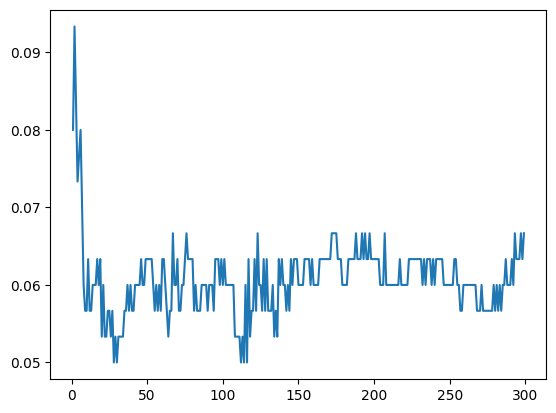

In [ ]:
plt.plot(range(1,300),error_rate)

In [ ]:
accuracy_score(Y_test,predict)

0.9366666666666666